In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image as imgs
import keras

from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
from PIL import Image as Imgs
import cv2 as cv
import glob
import os
import random

In [ ]:
!unzip '/gdrive/MyDrive/CS231.M21.KHCL/NopBaoCaoDoAn/20520934 + 20521384/Dataset FER2013/FER_13.zip'

In [ ]:
train_path = "train"

image_files = [f for f in glob.glob(train_path + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

data = []
labels = []
img_dimensions = (128,128,3)

In [ ]:
def Convert_Img(image_files, data, labels):
    for img in image_files:
    
        image = cv.imread(img)
    
        image = cv.resize(image, (img_dimensions[0],img_dimensions[1]))
        image = imgs.img_to_array(image)
        data.append(image)

        label = img.split(os.path.sep)[-2] # /content/drive/MyDrive/Gender_Dataset/GD_data/Train/female/*
        if label == "angry":
            label = 0
        elif label == "disgust":
            label = 1
        elif label == "fear":
            label = 2
        elif label == "happy":
            label = 3
        elif label == "neutral":
            label = 4
        elif label == "sad":
            label = 5
        elif label == "surprise":
            label = 6
        
        labels.append([label]) # [[1], [0], [0], ...]
    return data, labels

In [ ]:
X_train, y_train = Convert_Img(image_files,data,labels)

In [ ]:
X_train = np.array(X_train) / 255
y_train = np.array(y_train)


In [ ]:
test_path = "test"

image_files = [f for f in glob.glob(test_path + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

data = []
labels = []
img_dimensions = (128,128,3)

In [ ]:
X_test, y_test = Convert_Img(image_files,data,labels)

In [ ]:
X_test = np.array(X_test) / 255
y_test = np.array(y_test)

In [ ]:
y_test

array([[5],
       [4],
       [4],
       ...,
       [6],
       [0],
       [0]])

Detect hog feature

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

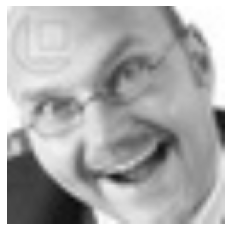

In [ ]:
plt.axis("off")
plt.imshow(cv.cvtColor(X_train[0], cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
img = X_train[0]

In [ ]:
y_train[0]

array([3])

C:\Users\nguye\AppData\Local\Temp\ipykernel_15600\1199346867.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),


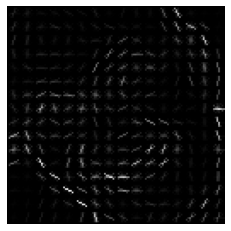

In [ ]:
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

In [ ]:
print(fd)

[0.28020737 0.28020737 0.16622573 ... 0.00980023 0.         0.00841439]


In [ ]:
from skimage import feature

def compute_hog_train(X_train):
    train_features =[]
    for img in X_train:
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
        fd = np.array(fd)
        train_features.append(fd)
    return train_features

In [ ]:
train_feature = compute_hog_train(X_train)
train_feature = np.array(train_feature)

C:\Users\nguye\AppData\Local\Temp\ipykernel_15600\1694085318.py:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),


KeyboardInterrupt: 

In [ ]:
train_feature

array([[0.2748378 , 0.2748378 , 0.00643199, ..., 0.0594552 , 0.15289633,
        0.3128103 ],
       [0.28597912, 0.05927605, 0.04203415, ..., 0.04846425, 0.        ,
        0.        ],
       [0.27340344, 0.17317243, 0.15339369, ..., 0.01381236, 0.00534306,
        0.0055738 ],
       ...,
       [0.29957402, 0.18239947, 0.07219521, ..., 0.00400309, 0.0050811 ,
        0.01539484],
       [0.15819018, 0.15553667, 0.28770623, ..., 0.2452173 , 0.31232893,
        0.07760894],
       [0.33916888, 0.33916888, 0.1385279 , ..., 0.08957797, 0.06479882,
        0.03806245]], dtype=float32)

hog feature in dataset

In [ ]:
test_feature = compute_hog_train(X_test)

C:\Users\nguye\AppData\Local\Temp\ipykernel_4360\1694085318.py:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),


In [ ]:
test_feature = np.array(test_feature)

In [ ]:
print(train_feature.shape)
print(y_train.shape)
print(test_feature.shape)
print(y_test.shape)

(28709, 900)
(28709, 1)
(7178, 900)
(7178, 1)


In [ ]:
from sklearn import svm

Rbf

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(train_feature,y_train)

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_pred = clf.predict(test_feature)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score as f1
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 346    0   80  169  154  181   28]
 [  34   22   14   13    8   17    3]
 [ 116    0  311  140  142  227   88]
 [  53    0   63 1416   98  121   23]
 [  81    0   73  191  660  203   25]
 [ 136    0   85  210  237  555   24]
 [  42    0   66   92   65   56  510]]


0.5321816662022848

In [ ]:
print(f1(y_test,y_pred,average=None))

[0.39184598 0.33082707 0.36247086 0.7071161  0.50827878 0.42577675
 0.66579634]


In [ ]:
from joblib import dump, load

In [ ]:
dump(clf, 'model_Huu_clf.joblib')

['model_Huu_clf.joblib']

Poly

In [ ]:
clf_pl = svm.SVC(kernel='poly')
clf_pl.fit(train_feature,y_train)

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [ ]:
y_pred = clf_pl.predict(test_feature)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 429    6  113  130  116  148   16]
 [  26   55   10    7    3    9    1]
 [ 152    8  417  101  108  167   71]
 [  98    2   79 1321  131  108   35]
 [ 146    1  120  180  587  170   29]
 [ 199    7  173  149  207  490   22]
 [  46    0   78   66   40   37  564]]


0.5381721928113681

predict img

In [ ]:
from keras.preprocessing import image


In [ ]:
test_image = image.load_img('E:/Code files/ipynb file/test/sad/PrivateTest_366361.jpg', target_size = (48, 48))
test_image = image.img_to_array(test_image)
test_image = test_image / 255
test_image, hog_image = hog(test_image, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)

C:\Users\nguye\AppData\Local\Temp\ipykernel_4360\1808499155.py:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  test_image, hog_image = hog(test_image, orientations=9, pixels_per_cell=(8, 8),


In [ ]:
test_image = np.array(test_image)
np.expand_dims(test_image, axis = 0)
test_image = test_image.reshape(1,-1)

In [ ]:
y_pred_single = clf_pl.predict(test_image)

In [ ]:
print(y_pred_single)

[5]


In [ ]:
dump(clf_pl, 'model_Huu_clf_pl.joblib')

['model_Huu_clf_pl.joblib']